In [ ]:
!pip install datasets librosa soundfile

In [1]:
from datasets import load_dataset

dataset = load_dataset('dataset')
dataset

Using the latest cached version of the dataset since dataset couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/kavyadhawan/.cache/huggingface/datasets/dataset/default/0.0.0/7af118f9049efbec (last modified on Fri Feb  7 20:32:55 2025).


DatasetDict({
    train: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 4934
    })
})

In [ ]:
print(dataset['train'][0])

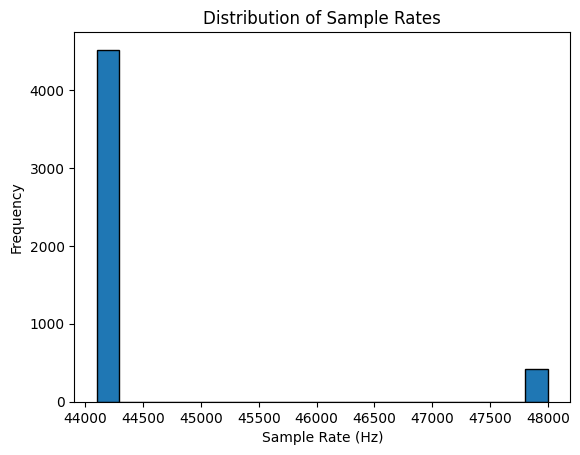

In [ ]:
import librosa
import os
import matplotlib.pyplot as plt

dataset_path = ""

sample_rates = []

for audio_file in os.listdir(dataset_path):
    if audio_file.endswith(".wav") or audio_file.endswith(".mp3"):
        file_path = os.path.join(dataset_path, audio_file)
            
        audio, sr = librosa.load(file_path, sr=None)  # sr=None preserves the original sample rate
        sample_rates.append(sr)

plt.hist(sample_rates, bins=20, edgecolor='black')
plt.title('Distribution of Sample Rates')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Frequency')
plt.show()


Analyzing the volume levels in audio using RMS

In [ ]:
import librosa
import numpy as np

# Function to compute RMS for a given audio file
def compute_rms(audio_path):
    y, sr = librosa.load(audio_path)
    rms_values = librosa.feature.rms(y=y) # get rms values of this file
    mean_rms = np.mean(rms_values) # get mean of the rms values
    std_rms = np.std(rms_values) # get std of the rms values
    return mean_rms, std_rms

rms_values_list = []
mean_rms_list = []
std_rms_list = []

for i in range(len(dataset['train'])):
    audio_path = dataset['train'][i]['audio']['path'] 
    mean_rms, std_rms = compute_rms(audio_path)
    mean_rms_list.append(mean_rms)
    std_rms_list.append(std_rms)

overall_mean = np.mean(mean_rms_list) # get mean of the mean of each file
overall_std = np.std(mean_rms_list) # get std of the std of each file

print(f"Overall Mean of RMS values: {overall_mean}")
print(f"Overall Standard Deviation of RMS values: {overall_std}")

Overall Mean of RMS values: 0.06636631488800049
Overall Standard Deviation of RMS values: 0.040809959173202515


Since the std doesn't vary much from the mean, the volume level is consistent across the audios.

Plot the mean rms values for each file:

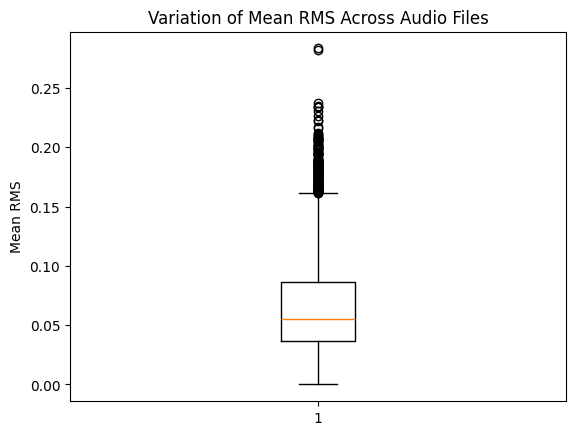

In [ ]:
import matplotlib.pyplot as plt

# Plot the mean RMS values across all audio files
plt.boxplot(mean_rms_list)
plt.title('Variation of Mean RMS Across Audio Files')
plt.ylabel('Mean RMS')
plt.show()

It shows outliers even though the std didn't differ. This could be because some audios are longer while majority are short, which can affect the RMS values.

In [ ]:
# import numpy as np

# example = minds[0]
# input_features = example["input_features"]

# plt.figure().set_figwidth(12)
# librosa.display.specshow(
#     np.asarray(input_features[0]),
#     x_axis="time",
#     y_axis="mel",
#     sr=feature_extractor.sampling_rate,
#     hop_length=feature_extractor.hop_length,
# )
# plt.colorbar()

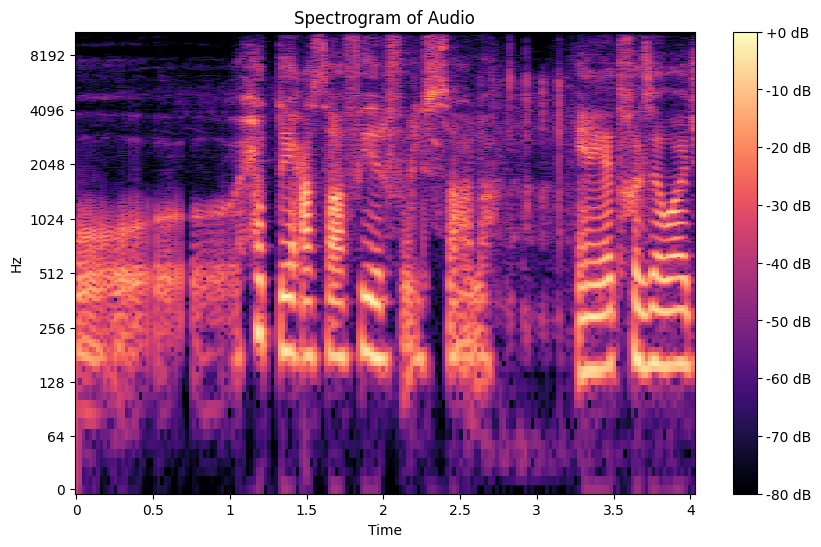

In [18]:
# Load the audio
y, sr = librosa.load('my_dataset_female/female_audio_segments_1/1_1.mp3')

# Compute the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Audio')
plt.show()
